### IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### More information
https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

### IMPORT DATA

In [3]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### DATA PREPROCESSING

In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### DATA VISUALIZATION

In [6]:
df['Churn'].value_counts()  # churn = 1, not churn = 0

No     5174
Yes    1869
Name: Churn, dtype: int64

Text(0.5, 1.0, 'Churn Count')

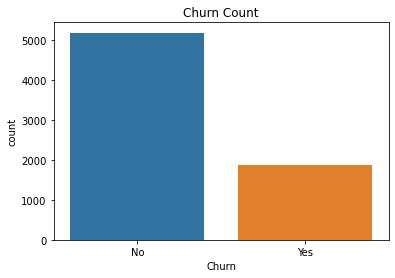

In [7]:
sns.countplot(x='Churn', data=df).set_title('Churn Count')

In [8]:
print('percentage of churn customer is  ',5174*100/(5174+1869))
print('percentage of not churn customer is  ',1869*100/(5174+1869))

percentage of churn customer is   73.46301292063042
percentage of not churn customer is   26.536987079369588


Imbalance dataset churn

HIGH CHANCE OF CHURN PROBABILITY

[Text(0.5, 1.0, 'Relationship between tenure and churn')]

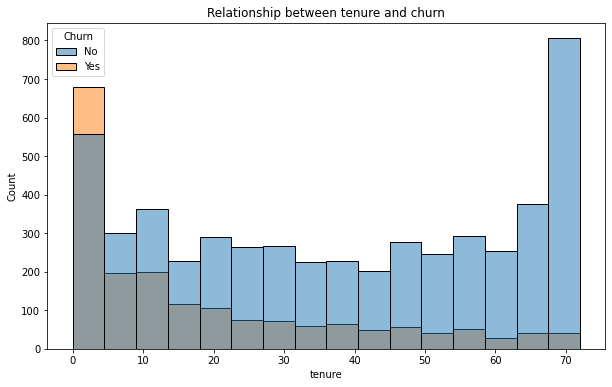

In [9]:
fig = plt.figure(figsize=(10,6))
sns.histplot(data=df, x='tenure', hue='Churn').set(title='Relationship between tenure and churn')

This graph show that as long as the customer stick to the product company, The less customer will churn.

[Text(0.5, 1.0, 'Relation between Contract and Churn')]

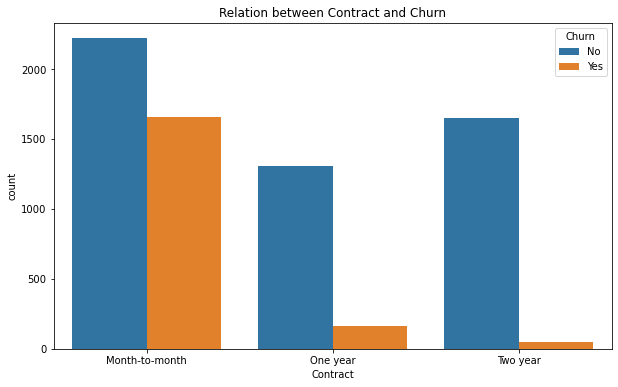

In [10]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Contract', hue='Churn').set(title='Relation between Contract and Churn')

This plot show that longer contract term has more probability to be not churn customer.

let look more deeply on customer MoM contract. 

In [11]:
df[df['Contract'] == 'Month-to-month']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


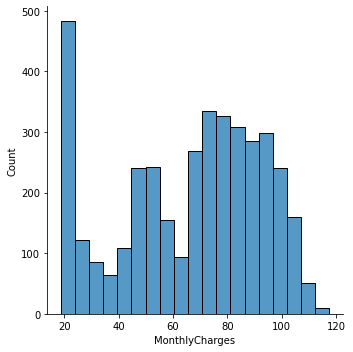

In [12]:
sns.displot(data=df[df['Contract'] == 'Month-to-month'],x='MonthlyCharges')

[Text(0.5, 1.0, 'Relation between OnlineSecurity and Churn')]

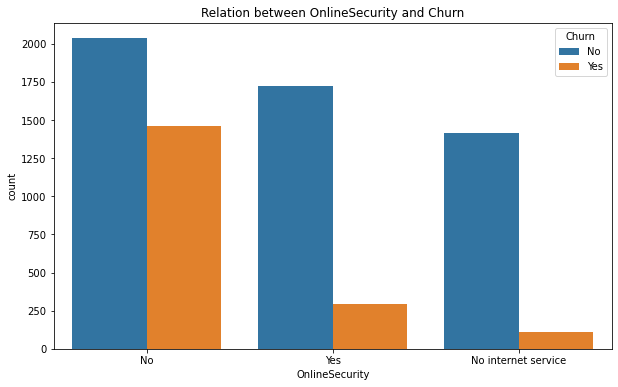

In [13]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x='OnlineSecurity', hue='Churn').set(title='Relation between OnlineSecurity and Churn')

This plot show that Non internet service has less customer churn. The service with OnlineSecurity has less churn compare with the service without OnlineSecurity.
Company has to look on customer that doesn't have OnlineSecurity. Maybe the service that with no Online Security has a problem.


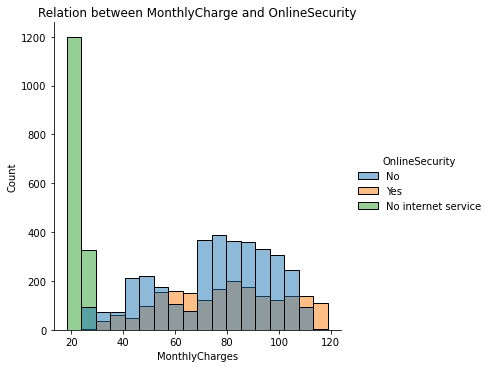

In [14]:
sns.displot(df, x="MonthlyCharges", hue="OnlineSecurity").set(title='Relation between MonthlyCharge and OnlineSecurity')

[Text(0.5, 1.0, 'Relation between MonthlyCharge and Churn')]

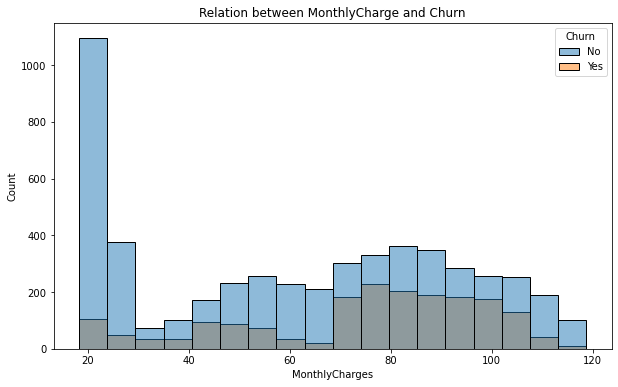

In [15]:
fig = plt.figure(figsize=(10,6))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn').set(title='Relation between MonthlyCharge and Churn')

In [16]:
print('OnlineSecurity - No internet service: ', len(df[df['OnlineSecurity'] == 'No internet service']))
print('OnlineBackup - No internet service: ', len(df[df['OnlineBackup'] == 'No internet service']))
print('DeviceProtection - No internet service: ', len(df[df['DeviceProtection'] == 'No internet service']))
print('TechSupport - No internet service: ', len(df[df['TechSupport'] == 'No internet service']))
print('StreamingTV - No internet service: ', len(df[df['StreamingTV'] == 'No internet service']))
print('StreamingMovies - No internet service: ', len(df[df['StreamingMovies'] == 'No internet service']))

OnlineSecurity - No internet service:  1526
OnlineBackup - No internet service:  1526
DeviceProtection - No internet service:  1526
TechSupport - No internet service:  1526
StreamingTV - No internet service:  1526
StreamingMovies - No internet service:  1526


In [17]:
df_all_no_internet = df[(df['OnlineSecurity'] == 'No internet service') & (df['OnlineBackup'] == 'No internet service') & (df['DeviceProtection'] == 'No internet service') & (df['TechSupport'] == 'No internet service') & (df['StreamingTV'] == 'No internet service') & (df['StreamingMovies'] == 'No internet service')]
print('Length of no internet service add-on from dataset: ', len(df_all_no_internet))


Length of no internet service add-on from dataset:  1526


In [18]:
df_all_no_internet_check = df[(df['OnlineSecurity'] == 'No internet service') | (df['OnlineBackup'] == 'No internet service') | (df['DeviceProtection'] == 'No internet service') | (df['TechSupport'] == 'No internet service') | (df['StreamingTV'] == 'No internet service') | (df['StreamingMovies'] == 'No internet service')]
print('Length of no internet service add-on from dataset: ', len(df_all_no_internet_check))

Length of no internet service add-on from dataset:  1526


From above cell, we found out that if the customer have no internet service in at least one columns from OnlineSecurity, OnlineBackup, DeviceProtection, Techsupport, StreamingTV, and StreamingMovies. All the entire columns will be no internet service too.


In [19]:
df_all_no_internet

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
11,7469-LKBCI,Male,0,No,No,16,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.8,No
16,8191-XWSZG,Female,0,No,No,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,No
21,1680-VDCWW,Male,0,Yes,No,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.80,202.25,No
22,1066-JKSGK,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
33,7310-EGVHZ,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,4807-IZYOZ,Female,0,No,No,51,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.65,1020.75,No
7019,9710-NJERN,Female,0,No,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.15,826,No
7020,9837-FWLCH,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.20,239,No
7030,0871-OPBXW,Female,0,No,No,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,39.25,No


In [20]:
df[df['MonthlyCharges'] < 30]
df[df['MonthlyCharges'] < 30]['OnlineSecurity'].value_counts()

No internet service    1526
No                      115
Yes                      12
Name: OnlineSecurity, dtype: int64

percentage of churn customer who doesnt have interet service is  7.404980340760157
percentage of not churn customer who doesnt have interet service is    92.59501965923984


<ipython-input-21-9fa1c5c4be9d>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len_nointernet_churn = len(df_no_internet[df['Churn'] == 'Yes'])
<ipython-input-21-9fa1c5c4be9d>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len_nointernet_not_churn = len(df_no_internet[df['Churn'] == 'No'])


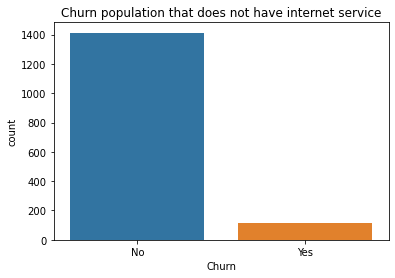

In [21]:
df_no_internet = df[df['OnlineSecurity'] == 'No internet service']
sns.countplot(x='Churn', data = df_no_internet ).set(title='Churn population that does not have internet service')

len_nointernet_churn = len(df_no_internet[df['Churn'] == 'Yes'])
len_nointernet_not_churn = len(df_no_internet[df['Churn'] == 'No'])

print('percentage of churn customer who doesnt have interet service is ' , len_nointernet_churn * 100/(len_nointernet_churn+len_nointernet_not_churn))
print('percentage of not churn customer who doesnt have interet service is   ', len_nointernet_not_churn*100/(len_nointernet_churn+len_nointernet_not_churn))

From the upper cell, the graph and percentage show that the customer who have no internet most likely to not churn. (Low churn rate for no internet service customer)

[Text(0.5, 1.0, 'Relation between SeniorCitizen and Churn')]

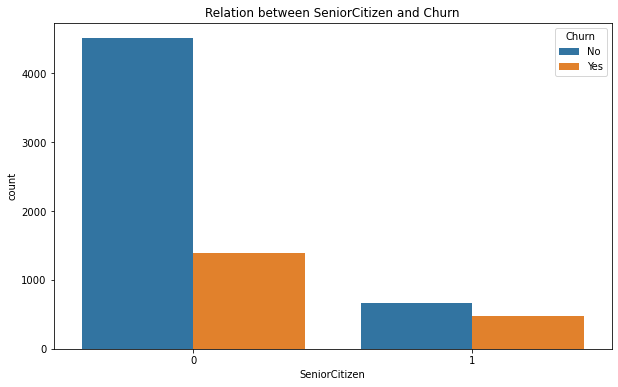

In [22]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x='SeniorCitizen', hue='Churn').set(title='Relation between SeniorCitizen and Churn')
#Senior Citizen: Indicates if the customer is 65 or older: Yes, No

(imbalance dataset!!!) This Plot show that customer who is  <= 65 is more likely to be churn. senior citizen have less information.

[Text(0.5, 1.0, 'Relation between PaymentMethod and Churn')]

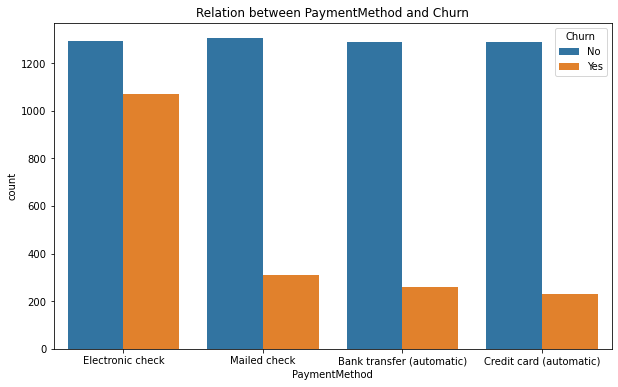

In [23]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x='PaymentMethod', hue='Churn').set(title='Relation between PaymentMethod and Churn')

This Plot indicate that most of the customer is use electronic check. company has to observe deeply why electronic check has more churn rate than other payment method.

[Text(0.5, 1.0, 'Relation between InternetService and Churn')]

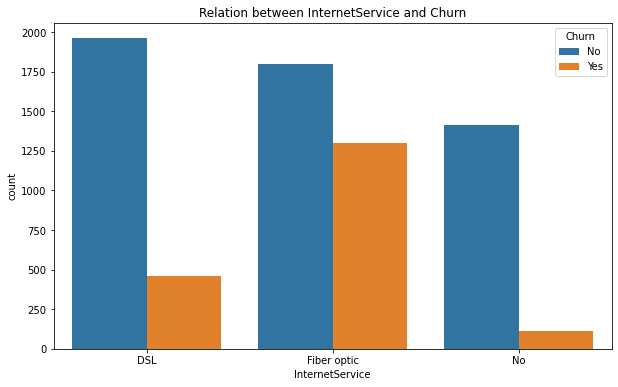

In [24]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x='InternetService', hue='Churn').set(title='Relation between InternetService and Churn')

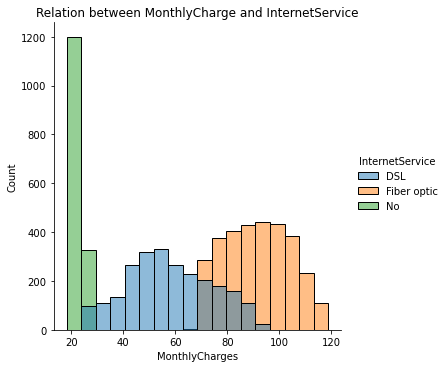

In [25]:
sns.displot(df, x="MonthlyCharges", hue="InternetService").set(title='Relation between MonthlyCharge and InternetService')

[Text(0.5, 1.0, 'Relation between OnlineBackup and Churn')]

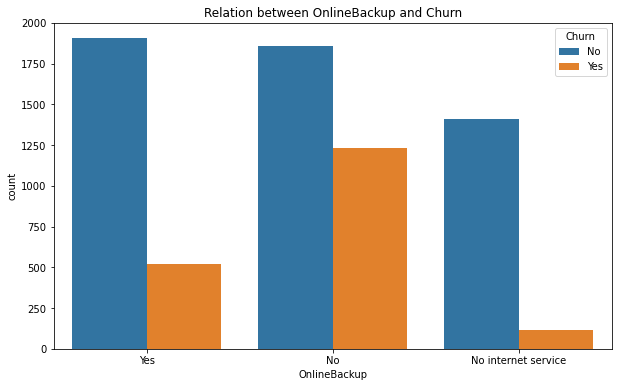

In [26]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x='OnlineBackup', hue='Churn').set(title='Relation between OnlineBackup and Churn')

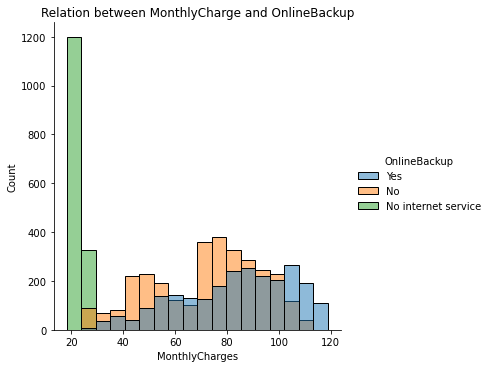

In [27]:
sns.displot(df, x="MonthlyCharges", hue="OnlineBackup").set(title='Relation between MonthlyCharge and OnlineBackup')

[Text(0.5, 1.0, 'Relation between DeviceProtection and Churn')]

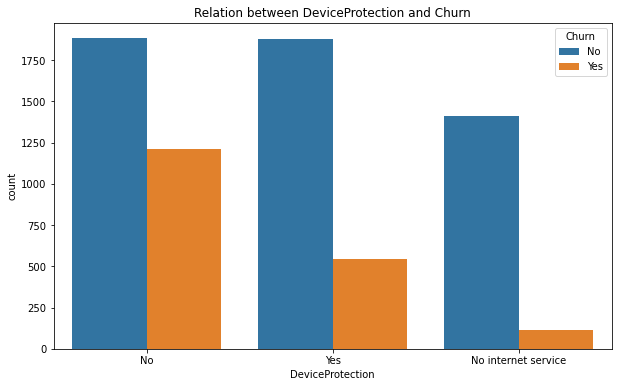

In [28]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x='DeviceProtection', hue='Churn').set(title='Relation between DeviceProtection and Churn')

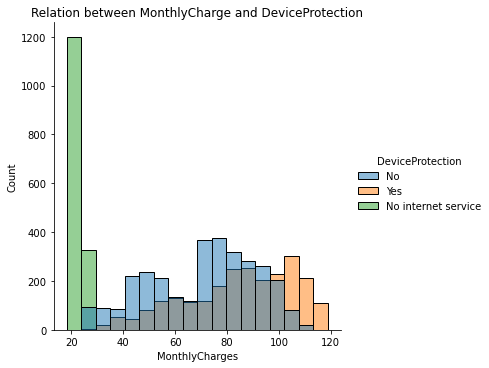

In [29]:
sns.displot(df, x="MonthlyCharges", hue="DeviceProtection").set(title='Relation between MonthlyCharge and DeviceProtection')

[Text(0.5, 1.0, 'Relation between TechSupport and Churn')]

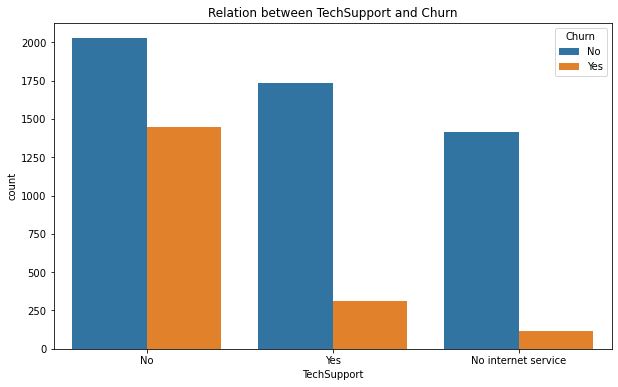

In [30]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x='TechSupport', hue='Churn').set(title='Relation between TechSupport and Churn')

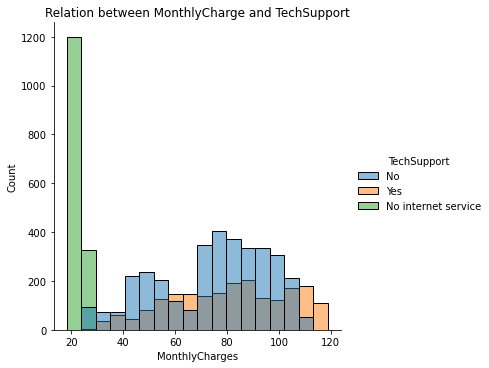

In [31]:
sns.displot(df, x="MonthlyCharges", hue="TechSupport").set(title='Relation between MonthlyCharge and TechSupport')

[Text(0.5, 1.0, 'Relation between Dependents and Churn')]

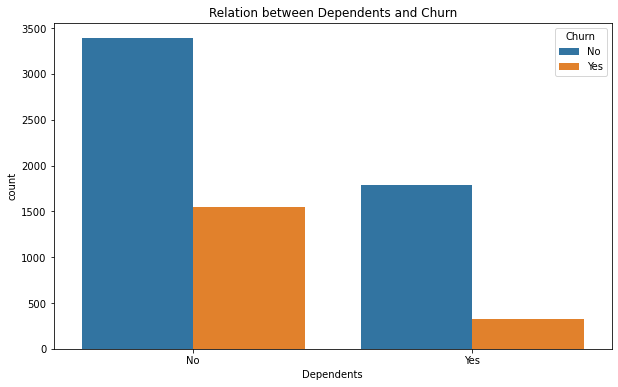

In [32]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Dependents', hue='Churn').set(title='Relation between Dependents and Churn')

NOT SURE IF CHURN PROBABILITY

[Text(0.5, 1.0, 'Relation between StreamingMovies and Churn')]

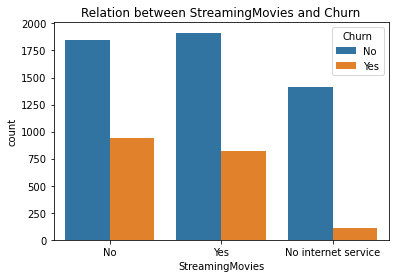

In [33]:
sns.countplot(data=df, x='StreamingMovies', hue='Churn').set(title='Relation between StreamingMovies and Churn')

[Text(0.5, 1.0, 'Relation between StreamingTV and Churn')]

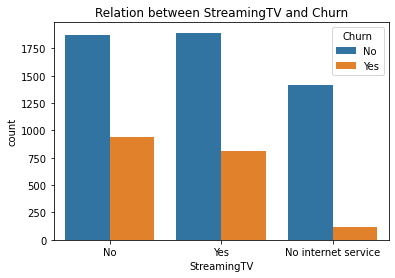

In [34]:
sns.countplot(data=df, x='StreamingTV', hue='Churn').set(title='Relation between StreamingTV and Churn')

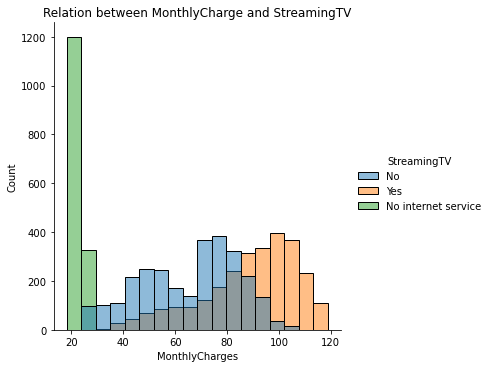

In [35]:
sns.displot(df, x="MonthlyCharges", hue="StreamingTV").set(title='Relation between MonthlyCharge and StreamingTV')

[Text(0.5, 1.0, 'Relation between MonthlyCharge and StreamingMovies')]

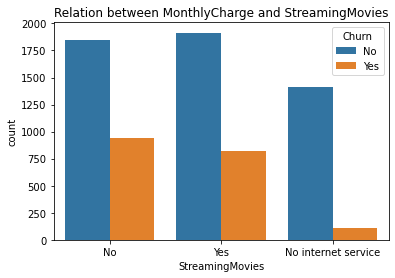

In [36]:
sns.countplot(data=df, x='StreamingMovies', hue='Churn').set(title='Relation between MonthlyCharge and StreamingMovies')

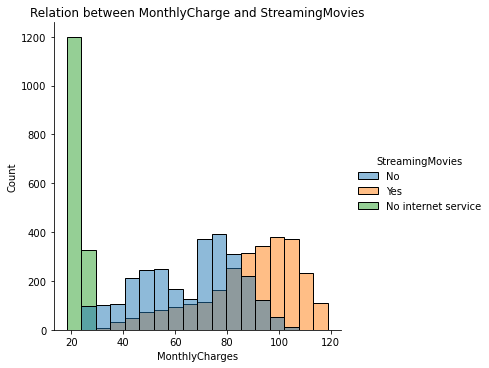

In [37]:
sns.displot(df, x="MonthlyCharges", hue="StreamingMovies").set(title='Relation between MonthlyCharge and StreamingMovies')

In [38]:
crosstab = pd.crosstab(df['StreamingMovies'],df['StreamingTV'])
crosstab

StreamingTV,No,No internet service,Yes
StreamingMovies,,,
No,2018,0,767
No internet service,0,1526,0
Yes,792,0,1940


[Text(0.5, 1.0, 'Relation between MultipleLines and Churn')]

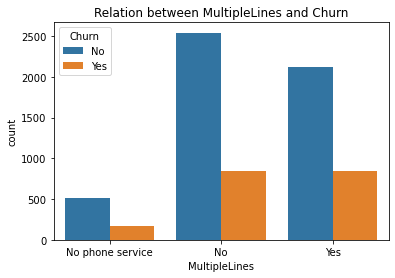

In [39]:
sns.countplot(data=df, x='MultipleLines', hue='Churn').set(title='Relation between MultipleLines and Churn')

[Text(0.5, 1.0, 'Relation between PhoneService and Churn')]

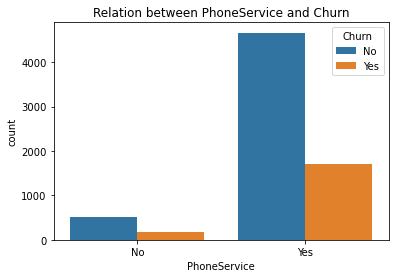

In [40]:
sns.countplot(data=df, x='PhoneService', hue='Churn').set(title='Relation between PhoneService and Churn')

[Text(0.5, 1.0, 'Relation between PaperlessBilling and Churn')]

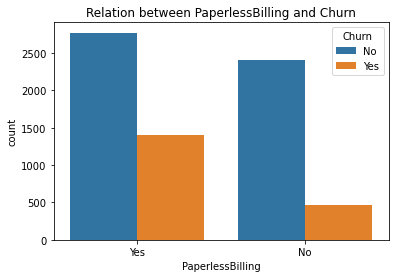

In [41]:
sns.countplot(data=df, x='PaperlessBilling', hue='Churn').set(title='Relation between PaperlessBilling and Churn')

In [42]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

<AxesSubplot:>

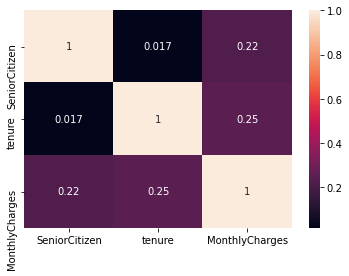

In [43]:
sns.heatmap(df.corr(), annot=True)

TRY EXPLORATION DATA

In [44]:
df['InternetService'].groupby(df['Churn']).value_counts()

Churn  InternetService
No     DSL                1962
       Fiber optic        1799
       No                 1413
Yes    Fiber optic        1297
       DSL                 459
       No                  113
Name: InternetService, dtype: int64

In [45]:
df['OnlineSecurity'].groupby(df['Churn']).value_counts()

Churn  OnlineSecurity     
No     No                     2037
       Yes                    1724
       No internet service    1413
Yes    No                     1461
       Yes                     295
       No internet service     113
Name: OnlineSecurity, dtype: int64

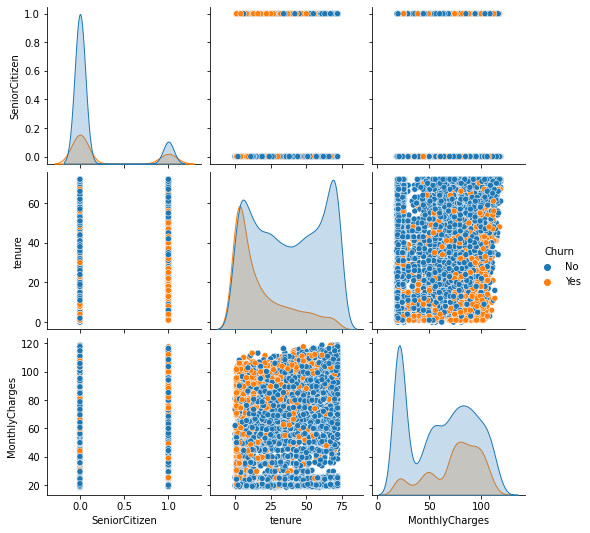

In [46]:
sns.pairplot(df, hue='Churn')

# Feature Engineering

In [47]:
df.select_dtypes(include=['object']).dtypes

customerID          object
gender              object
Partner             object
Dependents          object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
TotalCharges        object
Churn               object
dtype: object

In [48]:
df.select_dtypes(include=['number']).columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

create new column name no internet service column

In [49]:
df['No_Internet_Service'] = np.where(df['OnlineBackup'] == 'No internet service',1,0) # 1 No internet service, 0 has internet service 
df['No_Internet_Service'].value_counts()

0    5517
1    1526
Name: No_Internet_Service, dtype: int64

# DATA MODELING 

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

In [51]:
# Numerical: tenure 
# Categorical: Contract, OnlineSecurity ,PaymentMethod, no_internet_service  

In [52]:
df_model = df[['tenure','Contract','OnlineSecurity','InternetService','PaymentMethod', 'Churn']]
df_model

,tenure,Contract,OnlineSecurity,InternetService,PaymentMethod,Churn
0,1,Month-to-month,No,DSL,Electronic check,No
1,34,One year,Yes,DSL,Mailed check,No
2,2,Month-to-month,Yes,DSL,Mailed check,Yes
3,45,One year,Yes,DSL,Bank transfer (automatic),No
4,2,Month-to-month,No,Fiber optic,Electronic check,Yes
...,...,...,...,...,...,...
7038,24,One year,Yes,DSL,Mailed check,No
7039,72,One year,No,Fiber optic,Credit card (automatic),No
7040,11,Month-to-month,Yes,DSL,Electronic check,No
7041,4,Month-to-month,No,Fiber optic,Mailed check,Yes


In [53]:
contract = pd.get_dummies(df_model['Contract'],prefix='Contract')
onlinesecurity = pd.get_dummies(df_model['OnlineSecurity'],prefix='OnlineSecurity')
payment = pd.get_dummies(df_model['PaymentMethod'],prefix='PaymentMethod')
internet = pd.get_dummies(df_model['InternetService'],prefix='InternetService')

In [54]:
df_model = pd.concat([df_model, contract, onlinesecurity, payment,internet], axis=1)

In [55]:
df_model.drop(['Contract','OnlineSecurity','PaymentMethod', 'InternetService'], axis=1, inplace=True)


In [56]:
#df_model.drop(['OnlineSecurity_No internet service'], axis=1, inplace=True)
df_model.drop(['InternetService_No'], axis=1, inplace=True)

In [57]:
df_model['Churn'] = df_model['Churn'].map({'Yes':1, 'No':0})
df_model

,tenure,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic
0,1,0,1,0,0,1,0,0,0,0,1,0,1,0
1,34,0,0,1,0,0,0,1,0,0,0,1,1,0
2,2,1,1,0,0,0,0,1,0,0,0,1,1,0
3,45,0,0,1,0,0,0,1,1,0,0,0,1,0
4,2,1,1,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,0,0,1,0,0,0,1,0,0,0,1,1,0
7039,72,0,0,1,0,1,0,0,0,1,0,0,0,1
7040,11,0,1,0,0,0,0,1,0,0,1,0,1,0
7041,4,1,1,0,0,1,0,0,0,0,0,1,0,1


In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_model[['tenure']] = scaler.fit_transform(df_model[['tenure']])
df_model

,tenure,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic
0,-1.277445,0,1,0,0,1,0,0,0,0,1,0,1,0
1,0.066327,0,0,1,0,0,0,1,0,0,0,1,1,0
2,-1.236724,1,1,0,0,0,0,1,0,0,0,1,1,0
3,0.514251,0,0,1,0,0,0,1,1,0,0,0,1,0
4,-1.236724,1,1,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.340876,0,0,1,0,0,0,1,0,0,0,1,1,0
7039,1.613701,0,0,1,0,1,0,0,0,1,0,0,0,1
7040,-0.870241,0,1,0,0,0,0,1,0,0,1,0,1,0
7041,-1.155283,1,1,0,0,1,0,0,0,0,0,1,0,1


## Over-sampling using SMOTE

In [59]:
X = df_model.drop('Churn', axis = 1)
y = df_model['Churn']

In [60]:
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

In [61]:
os_data_X,os_data_y = os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Churn'])

os_data_X_test,os_data_y_test = os.fit_resample(X_test, y_test)

In [62]:
print("length of oversampled data is ",len(os_data_X))
print("Number of not churn in oversampled data",len(os_data_y[os_data_y['Churn']==0]))
print("Number of churn customer in oversampled data",len(os_data_y[os_data_y['Churn']==1]))
print("Proportion of churn data in oversampled data is ",len(os_data_y[os_data_y['Churn']==1])/len(os_data_X))

length of oversampled data is  7228
Number of not churn in oversampled data 3614
Number of churn customer in oversampled data 3614
Proportion of churn data in oversampled data is  0.5


[Text(0.5, 1.0, 'oversampled data')]

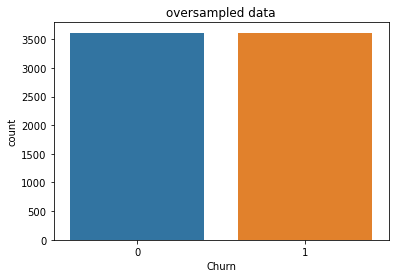

In [63]:
sns.countplot(data=os_data_y, x='Churn').set(title='oversampled data')

In [64]:
y_test.value_counts()

0    1560
1     553
Name: Churn, dtype: int64

In [65]:
os_data_y_test.value_counts()

0    1560
1    1560
Name: Churn, dtype: int64

In [66]:
#from sklearn.feature_selection import RFE

In [67]:
import statsmodels.api as sm
logit_model=sm.Logit(os_data_y,os_data_X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.466417
         Iterations 7
                                     Results: Logit
Model:                      Logit                    Pseudo R-squared:         0.327    
Dependent Variable:         Churn                    AIC:                      6768.5246
Date:                       2022-05-26 15:18         BIC:                      6858.0390
No. Observations:           7228                     Log-Likelihood:           -3371.3  
Df Model:                   12                       LL-Null:                  -5010.1  
Df Residuals:               7215                     LLR p-value:              0.0000   
Converged:                  1.0000                   Scale:                    1.0000   
No. Iterations:             7.0000                                                      
----------------------------------------------------------------------------------------
                                         Coef

In [68]:

clf = LogisticRegression(random_state=0)
clf.fit(os_data_X, os_data_y.values.ravel())

y_pred = clf.predict(os_data_X_test)

In [69]:
y_pred

array([0, 0, 1, ..., 1, 1, 1])

In [70]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [71]:
cm = confusion_matrix(os_data_y_test, y_pred)
print(cm)

[[1149  411]
 [ 271 1289]]


In [72]:
print('Accuracy = ', accuracy_score(os_data_y_test,y_pred))
print('F1-Score = ', f1_score(os_data_y_test,y_pred))
print('Precision = ', precision_score(os_data_y_test,y_pred))
print('Recall = ', recall_score(os_data_y_test,y_pred))

Accuracy =  0.7814102564102564
F1-Score =  0.7907975460122699
Precision =  0.758235294117647
Recall =  0.8262820512820512


In [73]:
print(classification_report(os_data_y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77      1560
           1       0.76      0.83      0.79      1560

    accuracy                           0.78      3120
   macro avg       0.78      0.78      0.78      3120
weighted avg       0.78      0.78      0.78      3120



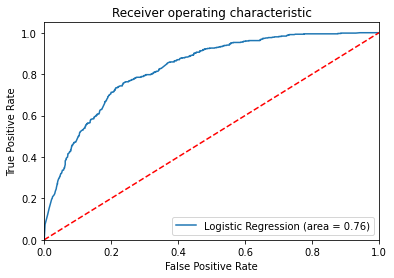

In [74]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

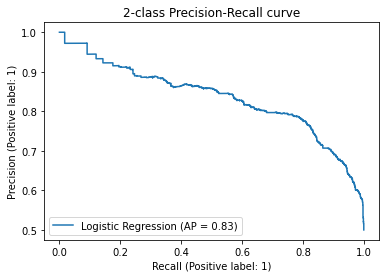

In [75]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    clf, os_data_X_test, os_data_y_test, name="Logistic Regression"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

RANDOM FOREST CLASSIFIER

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
rf = RandomForestClassifier()
rf.fit(os_data_X, os_data_y.values.ravel())

RandomForestClassifier()

In [78]:
y_predicted = rf.predict(os_data_X_test)
y_predicted

array([0, 1, 0, ..., 1, 1, 1])

In [79]:
cm_rf = confusion_matrix(os_data_y_test, y_predicted)
print(cm_rf)

[[1184  376]
 [ 420 1140]]


In [80]:
print('Accuracy = ', accuracy_score(os_data_y_test,y_predicted))
print('F1-Score = ', f1_score(os_data_y_test,y_predicted))
print('Precision = ', precision_score(os_data_y_test,y_predicted))
print('Recall = ', recall_score(os_data_y_test,y_predicted))

Accuracy =  0.7448717948717949
F1-Score =  0.741222366710013
Precision =  0.7519788918205804
Recall =  0.7307692307692307


LOGISTICS REGRESSION WITHOUT SMOTE

In [81]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
predicted = logreg.predict(X_test)

In [82]:
cm_logreg = confusion_matrix(y_test, predicted)
print(cm_logreg)

[[1398  162]
 [ 270  283]]


In [83]:
print('Accuracy = ', accuracy_score(y_test,predicted))
print('F1-Score = ', f1_score(y_test,predicted))
print('Precision = ', precision_score(y_test,predicted))
print('Recall = ', recall_score(y_test,predicted))

Accuracy =  0.795551348793185
F1-Score =  0.5671342685370742
Precision =  0.6359550561797753
Recall =  0.5117540687160941


In [84]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1560
           1       0.64      0.51      0.57       553

    accuracy                           0.80      2113
   macro avg       0.74      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113

